In [1]:
import cv2
import numpy as np
import os
import pytesseract
import matplotlib.pyplot as plt

In [2]:
def plot_images(img1, img2, title1='', title2=''):
    fig = plt.figure(figsize=[15, 15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap='gray')
    ax1.set(xticks=[], yticks=[], title=title1)
    
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap='gray')
    ax2.set(xticks=[], yticks=[], title=title2)

In [3]:
path = r'C:/Users/naman/Desktop/1.jpg'

In [5]:
image = cv2.imread(path)


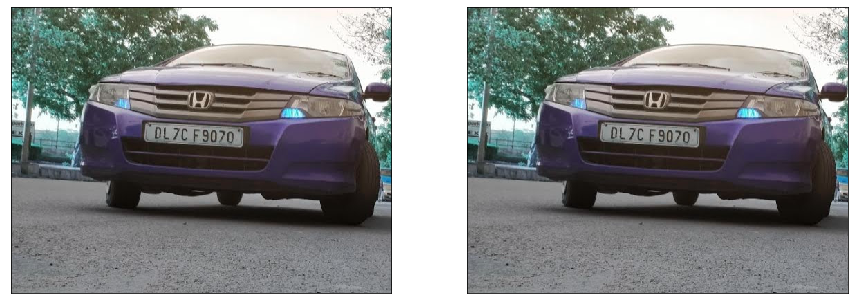

In [6]:
plot_images(image, image)

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

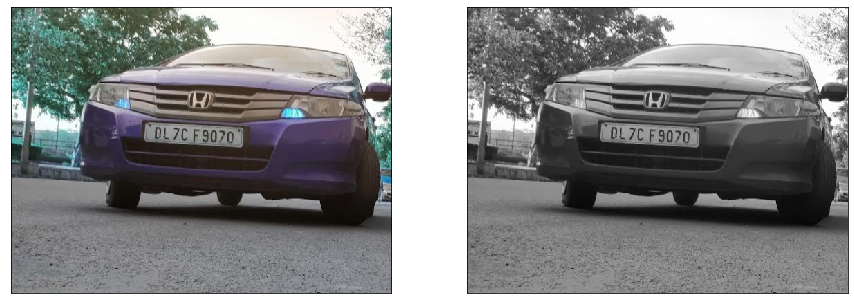

In [8]:
plot_images(image, gray)

In [9]:
blur = cv2.bilateralFilter(gray, 5, 150, 150)

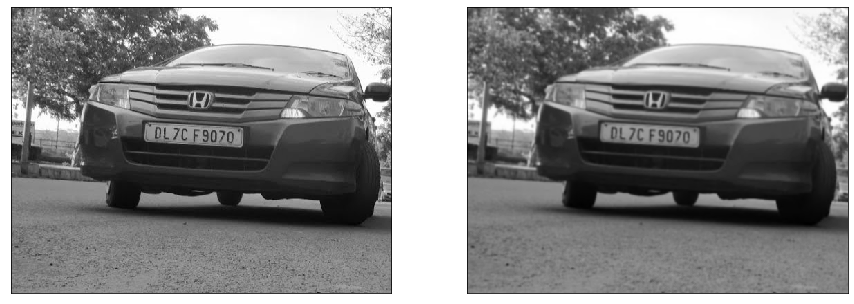

In [10]:
plot_images(gray, blur)

In [11]:
edges = cv2.Canny(blur, 30, 200)

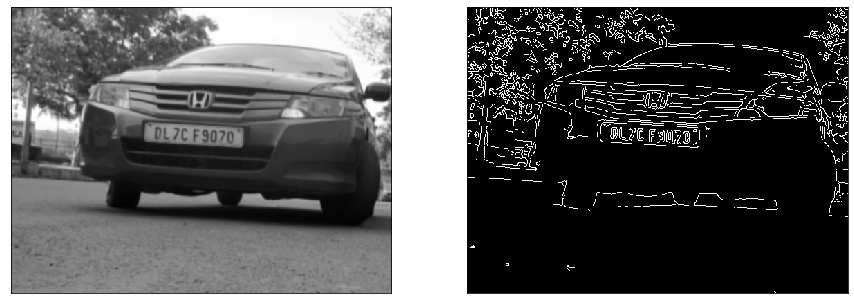

In [12]:
plot_images(blur, edges)

In [13]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [14]:
image_copy = image.copy()


In [15]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)


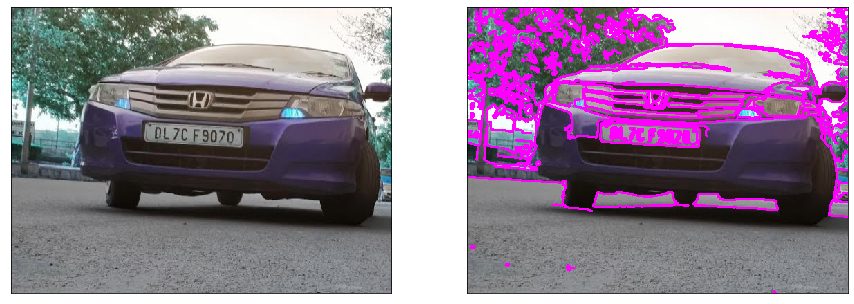

In [16]:
plot_images(image, image_copy)


In [17]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [18]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

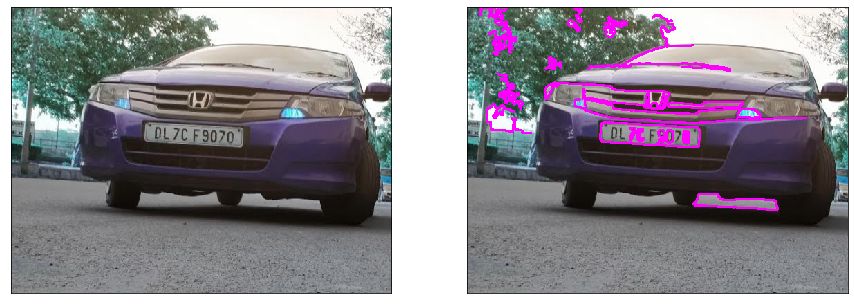

In [19]:
plot_images(image, image_copy)

In [20]:

plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

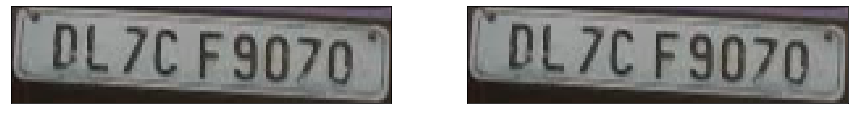

In [21]:
plot_images(plate, plate)

In [22]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(plate, lang="eng")
print(text)

BL7C F9070
